In [41]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

#prep
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler, QuantileTransformer

#models
from sklearn.ensemble import RandomForestRegressor

#validation libraries
from sklearn.cross_validation import KFold, StratifiedKFold
from IPython.display import display
from sklearn import metrics


%matplotlib inline
train=pd.read_csv("downloads/housing/train.csv")
test=pd.read_csv("downloads/housing/test.csv")
train.head(5)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape

(1459, 80)

In [6]:
train[["SalePrice"]].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [7]:
pd.DataFrame(train.as_matrix()).head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
na_value=train.isnull().sum()
na_value[na_value>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
train.fillna(0, inplace=True)

In [10]:
na=train.isnull().sum()
na[na>0]
#there are no null values

Series([], dtype: int64)

In [11]:
numeric_cols = [x for x in train.columns if ('Area' in x) | ('SF' in x)] + ['MSSubClass','3SsnPorch','SalePrice','LotFrontage','MiscVal','EnclosedPorch','ScreenPorch','OverallQual','OverallCond','YearBuilt']

for col in numeric_cols:
    train[col] = train[col].astype('float')

In [12]:
categorical_cols = [x for x in train.columns if x not in numeric_cols]

for col in categorical_cols:
    train[col] = train[col].astype('category')

categorical_cols

['Id',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

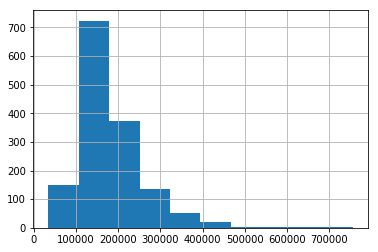

In [13]:
train['SalePrice'].hist()

In [14]:
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60.0,RL,65.0,8450.0,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.0,2,2008,WD,Normal,208500.0
1,2,20.0,RL,80.0,9600.0,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.0,5,2007,WD,Normal,181500.0
2,3,60.0,RL,68.0,11250.0,Pave,0,IR1,Lvl,AllPub,...,0.0,0,0,0,0.0,9,2008,WD,Normal,223500.0
3,4,70.0,RL,60.0,9550.0,Pave,0,IR1,Lvl,AllPub,...,0.0,0,0,0,0.0,2,2006,WD,Abnorml,140000.0
4,5,60.0,RL,84.0,14260.0,Pave,0,IR1,Lvl,AllPub,...,0.0,0,0,0,0.0,12,2008,WD,Normal,250000.0
5,6,50.0,RL,85.0,14115.0,Pave,0,IR1,Lvl,AllPub,...,0.0,0,MnPrv,Shed,700.0,10,2009,WD,Normal,143000.0
6,7,20.0,RL,75.0,10084.0,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.0,8,2007,WD,Normal,307000.0
7,8,60.0,RL,0.0,10382.0,Pave,0,IR1,Lvl,AllPub,...,0.0,0,0,Shed,350.0,11,2009,WD,Normal,200000.0
8,9,50.0,RM,51.0,6120.0,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.0,4,2008,WD,Abnorml,129900.0
9,10,190.0,RL,50.0,7420.0,Pave,0,Reg,Lvl,AllPub,...,0.0,0,0,0,0.0,1,2008,WD,Normal,118000.0


In [15]:
train.loc[train['SalePrice']>200000,'above_200k'] = 1
train.loc[train['SalePrice']<=200000,'above_200k'] = 0
train['above_200k'] = train['above_200k'].astype('category')
#converting continuos to categorical

In [16]:
train[['above_200k']].head()

,above_200k
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


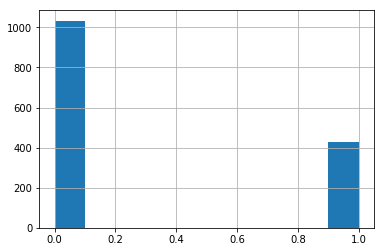

In [17]:
train['above_200k'].hist()

In [18]:
train['LivArea_Total'] = train['GrLivArea'] + train['GarageArea'] + train['PoolArea']
train[['LivArea_Total','GrLivArea','GarageArea','PoolArea']].head()


,LivArea_Total,GrLivArea,GarageArea,PoolArea
0,2258.0,1710.0,548.0,0.0
1,1722.0,1262.0,460.0,0.0
2,2394.0,1786.0,608.0,0.0
3,2359.0,1717.0,642.0,0.0
4,3034.0,2198.0,836.0,0.0


In [21]:
train['Lot_desc'] = train.apply(lambda val : val['MSZoning'] + val['LotShape'], axis=1)
train[['Lot_desc','MSZoning','LotShape']].head()


,Lot_desc,MSZoning,LotShape
0,RLReg,RL,Reg
1,RLReg,RL,Reg
2,RLIR1,RL,IR1
3,RLIR1,RL,IR1
4,RLIR1,RL,IR1


In the previous cell, we just used + operator to add rows together. But we can not do the same thing here because it consists of strings. So we use apply method to achieve that result.

In [22]:
mas = MaxAbsScaler()


train['LotArea_norm'] = (train[['LotArea']]-train[['LotArea']].min())/(train[['LotArea']].max()-train[['LotArea']].min())
train['LotArea_mas'] = mas.fit_transform(train[['LotArea']])

train[['LotArea_norm','LotArea_mas', 'LotArea']].head(5)

,LotArea_norm,LotArea_mas,LotArea
0,0.033420,0.039258,8450.0
1,0.038795,0.044600,9600.0
2,0.046507,0.052266,11250.0
3,0.038561,0.044368,9550.0
4,0.060576,0.066250,14260.0


In [23]:
train=pd.get_dummies(train)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Lot_desc_RHIR2,Lot_desc_RHReg,Lot_desc_RLIR1,Lot_desc_RLIR2,Lot_desc_RLIR3,Lot_desc_RLReg,Lot_desc_RMIR1,Lot_desc_RMIR2,Lot_desc_RMIR3,Lot_desc_RMReg
0,60.0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,...,0,0,0,0,0,1,0,0,0,0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,0.0,978.0,0.0,284.0,...,0,0,0,0,0,1,0,0,0,0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,162.0,486.0,0.0,434.0,...,0,0,1,0,0,0,0,0,0,0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,0.0,216.0,0.0,540.0,...,0,0,1,0,0,0,0,0,0,0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
#model prep
feature_cols = [col for col in train.columns if 'Price' not in col]
train[feature_cols]= (train[feature_cols]-train[feature_cols].min())/(train[feature_cols].max()-train[feature_cols].min())
feature_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'LivArea_Total',
 'LotArea_norm',
 'LotArea_mas',
 'Id_1',
 'Id_2',
 'Id_3',
 'Id_4',
 'Id_5',
 'Id_6',
 'Id_7',
 'Id_8',
 'Id_9',
 'Id_10',
 'Id_11',
 'Id_12',
 'Id_13',
 'Id_14',
 'Id_15',
 'Id_16',
 'Id_17',
 'Id_18',
 'Id_19',
 'Id_20',
 'Id_21',
 'Id_22',
 'Id_23',
 'Id_24',
 'Id_25',
 'Id_26',
 'Id_27',
 'Id_28',
 'Id_29',
 'Id_30',
 'Id_31',
 'Id_32',
 'Id_33',
 'Id_34',
 'Id_35',
 'Id_36',
 'Id_37',
 'Id_38',
 'Id_39',
 'Id_40',
 'Id_41',
 'Id_42',
 'Id_43',
 'Id_44',
 'Id_45',
 'Id_46',
 'Id_47',
 'Id_48',
 'Id_49',
 'Id_50',
 'Id_51',
 'Id_52',
 'Id_53',
 'Id_54',
 'Id_55',
 'Id_56',
 'Id_57',
 'Id_58',
 'Id_59',
 'Id_60',
 'Id_61',
 'Id_62'

In [25]:
y = train['SalePrice']
X = train[feature_cols]
print(y.head(2))

0    208500.0
1    181500.0
Name: SalePrice, dtype: float64


In [26]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Lot_desc_RHIR2,Lot_desc_RHReg,Lot_desc_RLIR1,Lot_desc_RLIR2,Lot_desc_RLIR3,Lot_desc_RLReg,Lot_desc_RMIR1,Lot_desc_RMIR2,Lot_desc_RMIR3,Lot_desc_RMReg
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.12250,0.125089,0.0,0.064212,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.00000,0.173281,0.0,0.121575,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.10125,0.086109,0.0,0.185788,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.00000,0.038271,0.0,0.231164,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.21875,0.116052,0.0,0.209760,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#splitting the train dataset into train and test to perform cross validation
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

((1168, 1995), (292, 1995), (1168L,), (292L,))


In [28]:
#Modelling
#Linear Regression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lm.score(X_valid,y_valid)


0.6159580164657538

In [30]:
lm.score(X_train,y_train)

1.0

In [31]:
y_pred = lm.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse
#The prediction is off by almost $30K.

48825.187427947494

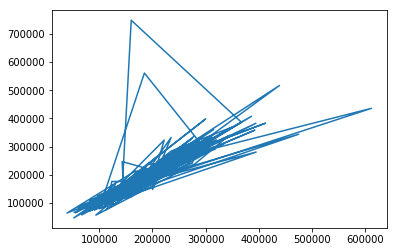

In [32]:
plt.plot(y_valid,y_pred)
plt.show()

In [33]:
rfr = RandomForestRegressor(n_jobs=-1, n_estimators=100)
rfr.fit(X,y)
rfr.score(X_valid,y_valid)

0.9871353196843808

In [34]:
y_pred = rfr.predict(X_valid)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_valid))
rmse

8936.224408363574

Compared to linear regression, random forest is giving us a better result as it has rmse of $8936.22. 